In [51]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import re
import warnings
import csv
warnings.filterwarnings('ignore')

### Establishing the connection
Created and Application in Twitter Developer account as Assessed-task-2 & copied the keyboard.

In [27]:
# Application creds made in developer account ...

consumer_key = 'jIXCU53opEikJKYRWK633SRTd'
consumer_key_secret = 'NTx4NDFUfJMuAZwg7DX4kRW7ZMpWUYUe8ZXi7fH8C5jWHhn4UZ'
access_token = '1371716702-hRzyepHlBcKVTvhI0W6Npdd7p78GjHEZb4w9v0y'
access_token_secret = 'JdvZubB0HLeqRY7qJLZ7oFZH2q9R2BPInDZ30TVEWnM7q'

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
# Authorisation of API key and API key secret.
auth.set_access_token(access_token, access_token_secret)
# Set access to user's access token and access token secret.
api = tweepy.API(auth)
# The API class provides access to the Twitter RESTful API method.

### Testing the connection

In [28]:
# Testing the authentication.
try:
    user = api.verify_credentials()
    print('Authentication OK.')
except:
    print('Error during authentication.')


Authentication OK.


# Task 1
Collect 400 tweets from two different Twitter users **(Australian politicians)**, 200 from each.  You should try to find two politicians where you would expect there to be some noticeable differences in their tweets.

**Selected politician for the Assessments:**<br>
Malcolm Turnbull with Screen name: @TurnbullMalcolm    *-Former PM of Australia. (2014-2018)*<br>
Kevin Rudd with Screen name: @MrKRudd      -* Former PM of Australia.*

### Collecting first 200 tweets of Malcolm Turnbull with Screen name: **@TurnbullMalcolm**

In [30]:
max_tweets = 200
screen_name = '@TurnbullMalcolm'
tweets_Malcolm = api.user_timeline(screen_name = screen_name, tweet_mode = 'extended', count = max_tweets)

In [31]:
Malcolm = []
for tweet in tweets_Malcolm:
    Malcolm.append(tweet._json)

with open('Data_scrapped/TurnbullMalcolm.json', mode = 'w') as file:
    file.write(json.dumps(Malcolm , indent = 4))

### Collecting first 200 tweets of Malcolm Turnbull with Screen name: **@MrRudd**

In [33]:
max_tweets = 200
screen_name = '@MrKRudd'
tweets_Rudd = api.user_timeline(screen_name = screen_name,tweet_mode = 'extended', count = max_tweets)

In [34]:
Rudd = []
for tweet in tweets_Rudd:
    Rudd.append(tweet._json)
    
with open('Data_scrapped/MrKRudd.json', mode = 'w') as file:
    file.write(json.dumps(Rudd , indent = 4))

## Creating listing for Malcolm

In [36]:
#listing the Malcolm Tweets and timings
Malcolm = []
with open('Data_scrapped/TurnbullMalcolm.json', encoding = 'utf-8', mode = 'r') as file:
        Malcolm_list = json.load(file)
        for dict in Malcolm_list:
             Malcolm.append({'user_id':str(dict['user']['name']),
                           'post_time':dict['created_at'],
                          'tweet':str(dict['full_text']),  
             })

In [37]:
Malcolm_df = pd.DataFrame(Malcolm , columns = ['user_id','post_time','tweet', ])
Malcolm_df.head(10)

,user_id,post_time,tweet
0,Malcolm Turnbull 💉💉,Sat Oct 16 11:07:59 +0000 2021,RT @BellaKwai: For todays' @nytimes Sat profil...
1,Malcolm Turnbull 💉💉,Sat Oct 16 05:39:45 +0000 2021,RT @emfarrelly: Why would anyone think the las...
2,Malcolm Turnbull 💉💉,Sat Oct 16 03:31:21 +0000 2021,Kevin makes a powerful point. Net zero by 2050...
3,Malcolm Turnbull 💉💉,Sat Oct 16 02:32:10 +0000 2021,A reminder of how recklessly misconceived was ...
4,Malcolm Turnbull 💉💉,Sat Oct 16 01:42:59 +0000 2021,RT @HGACinema: Happy 96th Birthday to Dame Ang...
5,Malcolm Turnbull 💉💉,Sat Oct 16 01:42:56 +0000 2021,@HGACinema @latimes @_AngelaLansbury Happy Bir...
6,Malcolm Turnbull 💉💉,Fri Oct 15 11:54:20 +0000 2021,RT @mjrowland68: This is quite the column by @...
7,Malcolm Turnbull 💉💉,Fri Oct 15 10:36:49 +0000 2021,RT @energynetworks: Join former Australian Pri...
8,Malcolm Turnbull 💉💉,Fri Oct 15 08:32:01 +0000 2021,"RT @WarOnTheRocks: ""The hyperbole around the n..."
9,Malcolm Turnbull 💉💉,Fri Oct 15 05:23:29 +0000 2021,Australia’s ageing submarine fleet could still...


In [38]:
#checking only 200 rows are fetched here.
Malcolm_df.shape

(200, 3)

In [13]:
Malcolm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    200 non-null    object
 1   post_time  200 non-null    object
 2   tweet      200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [39]:
#Need to change the datatype further for plotting post time,Hour
Malcolm_df['post_time'] = pd.to_datetime(Malcolm_df['post_time'])
Malcolm_df['hour'] = Malcolm_df['post_time'].dt.hour

In [15]:
Malcolm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   user_id    200 non-null    object             
 1   post_time  200 non-null    datetime64[ns, UTC]
 2   tweet      200 non-null    object             
 3   hour       200 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 6.4+ KB


## Creating lisitng for MrKRudd

In [40]:
#listing the Malcolm Tweets and timings
Rudd = []
with open('Data_scrapped/MrKRudd.json', encoding = 'utf-8', mode = 'r') as file:
        Rudd_list = json.load(file)
        for dict in Rudd_list:
             Rudd.append({'user_id':str(dict['user']['name']),
                           'post_time':dict['created_at'],
                          'tweet':str(dict['full_text']),  
             })

In [41]:
Rudd_df = pd.DataFrame(Rudd , columns = ['user_id','post_time','tweet', ])
Rudd_df.head(10)

,user_id,post_time,tweet
0,Kevin Rudd,Sat Oct 16 22:04:06 +0000 2021,Useful summary of the political bilge we’ve ha...
1,Kevin Rudd,Sat Oct 16 21:40:07 +0000 2021,Insightful piece by the ABC’s Laura Tingle. So...
2,Kevin Rudd,Sat Oct 16 07:53:44 +0000 2021,Real estate conglomerate Evergrande’s problems...
3,Kevin Rudd,Sat Oct 16 01:33:00 +0000 2021,Murdoch's Liberal protection racket on vivid d...
4,Kevin Rudd,Fri Oct 15 22:39:40 +0000 2021,"Now he's been shamed into going, Morrison must..."
5,Kevin Rudd,Fri Oct 15 02:02:14 +0000 2021,A classic Morrison hatchet job. This professio...
6,Kevin Rudd,Fri Oct 15 01:09:51 +0000 2021,Memo to Morrison: We are not amused. https://t...
7,Kevin Rudd,Thu Oct 14 08:53:46 +0000 2021,Young Australians are miles ahead of Morrison ...
8,Kevin Rudd,Thu Oct 14 05:29:50 +0000 2021,This is just dangerous with NSW coming out of ...
9,Kevin Rudd,Wed Oct 13 02:08:32 +0000 2021,Prepare for more of this sort of fearless &amp...


In [42]:
#checking only 200 rows are fetched here.
Rudd_df.shape

(200, 3)

In [43]:
Rudd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    200 non-null    object
 1   post_time  200 non-null    object
 2   tweet      200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [44]:
#Need to change the datatype further for plotting post time,Hour
Rudd_df['post_time'] = pd.to_datetime(Rudd_df['post_time'])
Rudd_df['hour'] = Rudd_df['post_time'].dt.hour

In [45]:
Rudd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   user_id    200 non-null    object             
 1   post_time  200 non-null    datetime64[ns, UTC]
 2   tweet      200 non-null    object             
 3   hour       200 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 6.4+ KB


## Listing Both Twitter Account to one table

In [46]:
df = pd.concat([Malcolm_df,Rudd_df], axis=0).reset_index()
df

,index,user_id,post_time,tweet,hour
0,0,Malcolm Turnbull 💉💉,2021-10-16 11:07:59+00:00,RT @BellaKwai: For todays' @nytimes Sat profil...,11
1,1,Malcolm Turnbull 💉💉,2021-10-16 05:39:45+00:00,RT @emfarrelly: Why would anyone think the las...,5
2,2,Malcolm Turnbull 💉💉,2021-10-16 03:31:21+00:00,Kevin makes a powerful point. Net zero by 2050...,3
3,3,Malcolm Turnbull 💉💉,2021-10-16 02:32:10+00:00,A reminder of how recklessly misconceived was ...,2
4,4,Malcolm Turnbull 💉💉,2021-10-16 01:42:59+00:00,RT @HGACinema: Happy 96th Birthday to Dame Ang...,1
...,...,...,...,...,...
395,195,Kevin Rudd,2021-08-19 05:15:11+00:00,What is it about Liberals who think they can j...,5
396,196,Kevin Rudd,2021-08-18 10:55:59+00:00,"Berejiklian, having ignored advice to lock dow...",10
397,197,Kevin Rudd,2021-08-18 02:57:15+00:00,"Today is #VietnamVeteransDay, marking 55 years...",2
398,198,Kevin Rudd,2021-08-18 00:02:47+00:00,"No, Scotty. When you withdrew all our embassy ...",0


In [47]:
#csv path
PATH = "Data_scrapped/tweets_summary.csv"
df.to_csv(PATH)

# Task 2
Use pandas to plot the posting times of the tweets for the two users in one bar chart; the aim of the plot is to distinguish the two users.

In [54]:
#Extract posting hour from posting_time
Malcolm_df['post_time'] = pd.to_datetime(Malcolm_df['post_time'])
Rudd_df['hour'] = Malcolm_df['post_time'].dt.hour
Rudd_df['post_time'] = pd.to_datetime(Rudd_df['post_time'])
Rudd_df['hour'] = Rudd_df['post_time'].dt.hour

In [55]:
Rudd_df

,user_id,post_time,tweet,hour
0,Kevin Rudd,2021-10-16 22:04:06+00:00,Useful summary of the political bilge we’ve ha...,22
1,Kevin Rudd,2021-10-16 21:40:07+00:00,Insightful piece by the ABC’s Laura Tingle. So...,21
2,Kevin Rudd,2021-10-16 07:53:44+00:00,Real estate conglomerate Evergrande’s problems...,7
3,Kevin Rudd,2021-10-16 01:33:00+00:00,Murdoch's Liberal protection racket on vivid d...,1
4,Kevin Rudd,2021-10-15 22:39:40+00:00,"Now he's been shamed into going, Morrison must...",22
...,...,...,...,...
195,Kevin Rudd,2021-08-19 05:15:11+00:00,What is it about Liberals who think they can j...,5
196,Kevin Rudd,2021-08-18 10:55:59+00:00,"Berejiklian, having ignored advice to lock dow...",10
197,Kevin Rudd,2021-08-18 02:57:15+00:00,"Today is #VietnamVeteransDay, marking 55 years...",2
198,Kevin Rudd,2021-08-18 00:02:47+00:00,"No, Scotty. When you withdrew all our embassy ...",0


In [64]:
Malcolm_post_hour= Malcolm_df['hour'].value_counts().sort_index().to_frame('Malcolm_post_per_hour')
Malcolm_post_hour['hour'] = Malcolm_post_hour.index
Malcolm_post_hour.reset_index(drop=True, inplace=True)
Malcolm_post_hour = Malcolm_post_hour[['hour','Malcolm_post_per_hour']]
Malcolm_post_hour.head(3)

,hour,Malcolm_post_per_hour
0,0,7
1,1,7
2,2,12


In [68]:
Rudd_post_hour= Rudd_df['hour'].value_counts().sort_index().to_frame('Rudd_post_per_hour')
Rudd_post_hour['hour'] = Rudd_post_hour.index
Rudd_post_hour.reset_index(drop=True, inplace=True)
Rudd_post_hour = Rudd_post_hour[['hour','Rudd_post_per_hour']]
Rudd_post_hour.head(3)

,hour,Rudd_post_per_hour
0,0,9
1,1,18
2,2,18


### Merging the above two split hours count into one table.

In [85]:
df_hours = pd.merge(Malcolm_post_hour, Rudd_post_hour,on = ['hour'], how = 'outer')
df_hours.fillna(0, inplace=True) #throwing error without this NA filter

df_hours.set_index('hour', inplace=True)
df_hours = df_hours.sort_index(). astype(int)
df_hours

,Malcolm_post_per_hour,Rudd_post_per_hour
hour,,
0,7,9
1,7,18
2,12,18
3,5,13
4,3,8
5,13,18
6,8,24
7,2,14
8,15,10


### Plotting the Bar Graph using pandas

Text(0.5, 0, 'Time')

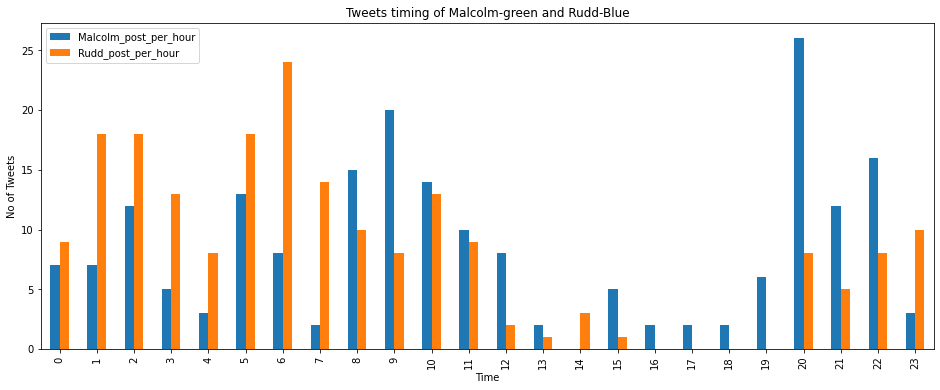

In [89]:
# Rudd_df & Malcolm_df are the data frame here. and df carries both listing together 
df_hours.plot(kind='bar', figsize=(16,6))
plt.title('Tweets timing of Malcolm-green and Rudd-Blue')
plt.ylabel('No of Tweets')
plt.xlabel('Time')

## From the above we got to know that the both users tweets active mostly in the morning time, whereas Malcolm tend to use tweet afternoon comparing to the Rudd.

# Task 3

Use pandas to construct one bar chart of the proportions of tweets for each of the two users that contain pictures or links.<br>
Removing all the retweets in the step 2 as its asking for only tweets mades.

In [90]:
#using regular expression to filter it out
df['text_without_links'] = df['tweet'].str.replace('http\S+|www.\S+', '', case = False)
df

,index,user_id,post_time,tweet,hour,text_without_links
0,0,Malcolm Turnbull 💉💉,2021-10-16 11:07:59+00:00,RT @BellaKwai: For todays' @nytimes Sat profil...,11,RT @BellaKwai: For todays' @nytimes Sat profil...
1,1,Malcolm Turnbull 💉💉,2021-10-16 05:39:45+00:00,RT @emfarrelly: Why would anyone think the las...,5,RT @emfarrelly: Why would anyone think the las...
2,2,Malcolm Turnbull 💉💉,2021-10-16 03:31:21+00:00,Kevin makes a powerful point. Net zero by 2050...,3,Kevin makes a powerful point. Net zero by 2050...
3,3,Malcolm Turnbull 💉💉,2021-10-16 02:32:10+00:00,A reminder of how recklessly misconceived was ...,2,A reminder of how recklessly misconceived was ...
4,4,Malcolm Turnbull 💉💉,2021-10-16 01:42:59+00:00,RT @HGACinema: Happy 96th Birthday to Dame Ang...,1,RT @HGACinema: Happy 96th Birthday to Dame Ang...
...,...,...,...,...,...,...
395,195,Kevin Rudd,2021-08-19 05:15:11+00:00,What is it about Liberals who think they can j...,5,What is it about Liberals who think they can j...
396,196,Kevin Rudd,2021-08-18 10:55:59+00:00,"Berejiklian, having ignored advice to lock dow...",10,"Berejiklian, having ignored advice to lock dow..."
397,197,Kevin Rudd,2021-08-18 02:57:15+00:00,"Today is #VietnamVeteransDay, marking 55 years...",2,"Today is #VietnamVeteransDay, marking 55 years..."
398,198,Kevin Rudd,2021-08-18 00:02:47+00:00,"No, Scotty. When you withdrew all our embassy ...",0,"No, Scotty. When you withdrew all our embassy ..."


In [91]:
df['tweet_links'] = df['tweet'].apply(lambda x: re.findall(r"http\S+|www.\S+", x))
df

,index,user_id,post_time,tweet,hour,text_without_links,tweet_links
0,0,Malcolm Turnbull 💉💉,2021-10-16 11:07:59+00:00,RT @BellaKwai: For todays' @nytimes Sat profil...,11,RT @BellaKwai: For todays' @nytimes Sat profil...,[]
1,1,Malcolm Turnbull 💉💉,2021-10-16 05:39:45+00:00,RT @emfarrelly: Why would anyone think the las...,5,RT @emfarrelly: Why would anyone think the las...,[]
2,2,Malcolm Turnbull 💉💉,2021-10-16 03:31:21+00:00,Kevin makes a powerful point. Net zero by 2050...,3,Kevin makes a powerful point. Net zero by 2050...,[https://t.co/rVUWwruBIU]
3,3,Malcolm Turnbull 💉💉,2021-10-16 02:32:10+00:00,A reminder of how recklessly misconceived was ...,2,A reminder of how recklessly misconceived was ...,[https://t.co/1oraGjo3kq]
4,4,Malcolm Turnbull 💉💉,2021-10-16 01:42:59+00:00,RT @HGACinema: Happy 96th Birthday to Dame Ang...,1,RT @HGACinema: Happy 96th Birthday to Dame Ang...,[]
...,...,...,...,...,...,...,...
395,195,Kevin Rudd,2021-08-19 05:15:11+00:00,What is it about Liberals who think they can j...,5,What is it about Liberals who think they can j...,[https://t.co/oQp2FdC3V2]
396,196,Kevin Rudd,2021-08-18 10:55:59+00:00,"Berejiklian, having ignored advice to lock dow...",10,"Berejiklian, having ignored advice to lock dow...",[https://t.co/C3j6NnQtpy]
397,197,Kevin Rudd,2021-08-18 02:57:15+00:00,"Today is #VietnamVeteransDay, marking 55 years...",2,"Today is #VietnamVeteransDay, marking 55 years...",[https://t.co/hM0LeXMz9w]
398,198,Kevin Rudd,2021-08-18 00:02:47+00:00,"No, Scotty. When you withdrew all our embassy ...",0,"No, Scotty. When you withdrew all our embassy ...",[https://t.co/Na9pf9dsBX]


## Removing the RE-Tweets from the Tweet collections

In [92]:
df = df[~df['tweet'].str.startswith('RT')]
df.head(5)

,index,user_id,post_time,tweet,hour,text_without_links,tweet_links
2,2,Malcolm Turnbull 💉💉,2021-10-16 03:31:21+00:00,Kevin makes a powerful point. Net zero by 2050...,3,Kevin makes a powerful point. Net zero by 2050...,[https://t.co/rVUWwruBIU]
3,3,Malcolm Turnbull 💉💉,2021-10-16 02:32:10+00:00,A reminder of how recklessly misconceived was ...,2,A reminder of how recklessly misconceived was ...,[https://t.co/1oraGjo3kq]
5,5,Malcolm Turnbull 💉💉,2021-10-16 01:42:56+00:00,@HGACinema @latimes @_AngelaLansbury Happy Bir...,1,@HGACinema @latimes @_AngelaLansbury Happy Bir...,[]
9,9,Malcolm Turnbull 💉💉,2021-10-15 05:23:29+00:00,Australia’s ageing submarine fleet could still...,5,Australia’s ageing submarine fleet could still...,[https://t.co/DZPNMWIGwL]
10,10,Malcolm Turnbull 💉💉,2021-10-14 05:02:42+00:00,Andrew Forrest urges Scott Morrison to commit ...,5,Andrew Forrest urges Scott Morrison to commit ...,[https://t.co/ehIskk3GWm]


## Filtering the Data by Tweet contains Pictures or links

In [97]:
linked_tweet = df['tweet'].apply(lambda x: re.findall(r"http\S+|www.\S+", x))
linked_tweet.head(3)

0    [https://t.co/rVUWwruBIU]
1    [https://t.co/1oraGjo3kq]
2                           []
Name: tweet, dtype: object

In [101]:
#adding a new col at the end which shows the Tweet contains link or not.
df['links_boolean'] = df['tweet'].apply(lambda x: re.findall(r"http\S+|www.\S+", x)).apply((lambda x: len(x) != 0))                             
df

,level_0,index,user_id,post_time,tweet,hour,text_without_links,tweet_links,links_boolean
0,2,2,Malcolm Turnbull 💉💉,2021-10-16 03:31:21+00:00,Kevin makes a powerful point. Net zero by 2050...,3,Kevin makes a powerful point. Net zero by 2050...,[https://t.co/rVUWwruBIU],True
1,3,3,Malcolm Turnbull 💉💉,2021-10-16 02:32:10+00:00,A reminder of how recklessly misconceived was ...,2,A reminder of how recklessly misconceived was ...,[https://t.co/1oraGjo3kq],True
2,5,5,Malcolm Turnbull 💉💉,2021-10-16 01:42:56+00:00,@HGACinema @latimes @_AngelaLansbury Happy Bir...,1,@HGACinema @latimes @_AngelaLansbury Happy Bir...,[],False
3,9,9,Malcolm Turnbull 💉💉,2021-10-15 05:23:29+00:00,Australia’s ageing submarine fleet could still...,5,Australia’s ageing submarine fleet could still...,[https://t.co/DZPNMWIGwL],True
4,10,10,Malcolm Turnbull 💉💉,2021-10-14 05:02:42+00:00,Andrew Forrest urges Scott Morrison to commit ...,5,Andrew Forrest urges Scott Morrison to commit ...,[https://t.co/ehIskk3GWm],True
...,...,...,...,...,...,...,...,...,...
250,395,195,Kevin Rudd,2021-08-19 05:15:11+00:00,What is it about Liberals who think they can j...,5,What is it about Liberals who think they can j...,[https://t.co/oQp2FdC3V2],True
251,396,196,Kevin Rudd,2021-08-18 10:55:59+00:00,"Berejiklian, having ignored advice to lock dow...",10,"Berejiklian, having ignored advice to lock dow...",[https://t.co/C3j6NnQtpy],True
252,397,197,Kevin Rudd,2021-08-18 02:57:15+00:00,"Today is #VietnamVeteransDay, marking 55 years...",2,"Today is #VietnamVeteransDay, marking 55 years...",[https://t.co/hM0LeXMz9w],True
253,398,198,Kevin Rudd,2021-08-18 00:02:47+00:00,"No, Scotty. When you withdrew all our embassy ...",0,"No, Scotty. When you withdrew all our embassy ...",[https://t.co/Na9pf9dsBX],True


## To plot the bar chart calculating the propotion of tweet with links & images

In [103]:
Picture_df = df.groupby(['user_id','links_boolean']).size().reset_index(name ='count')
Picture_df['total'] = Picture_df.groupby(['user_id'])['count'].transform('sum')
Picture_df = Picture_df.sort_values(by=['total'], ascending=False)
Picture_df.head(10)

,user_id,links_boolean,count,total
0,Kevin Rudd,False,2,198
1,Kevin Rudd,True,196,198
2,Malcolm Turnbull 💉💉,False,21,57
3,Malcolm Turnbull 💉💉,True,36,57


In [104]:
Picture_df['percentage'] = [i / j * 100 for i,j in zip(Picture_df['count'], Picture_df['total'])]
Picture_df

,user_id,links_boolean,count,total,percentage
0,Kevin Rudd,False,2,198,1.010101
1,Kevin Rudd,True,196,198,98.989899
2,Malcolm Turnbull 💉💉,False,21,57,36.842105
3,Malcolm Turnbull 💉💉,True,36,57,63.157895


In [105]:
final_filter = ['user_id', 'percentage']
Picture_df_present = Picture_df[Picture_df['links_boolean'] == True]
Picture_df_present = Picture_df_present[final_filter]
Picture_df_present.head()

,user_id,percentage
1,Kevin Rudd,98.989899
3,Malcolm Turnbull 💉💉,63.157895


In [106]:
Picture_df_present.describe()

,percentage
count,2.000000
mean,81.073897
std,25.337053
min,63.157895
25%,72.115896
50%,81.073897
75%,90.031898
max,98.989899


Text(0, 0.5, 'Percentage')

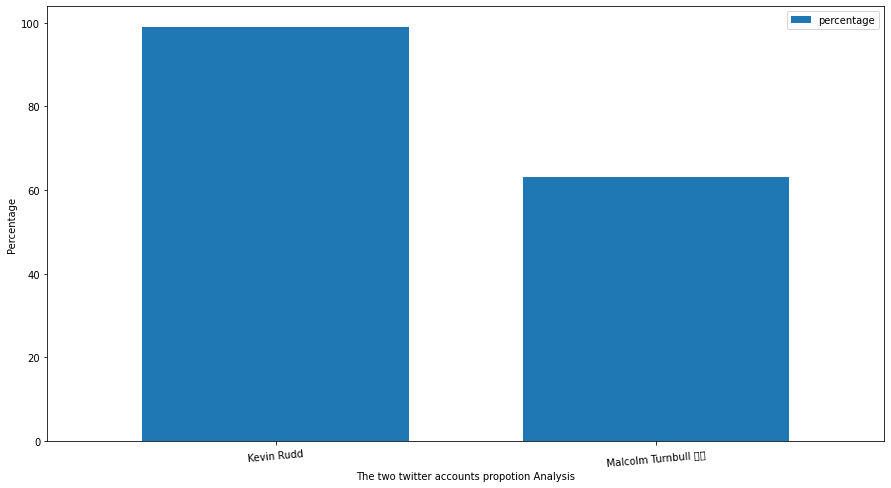

In [129]:
ax = Picture_df_present.plot(kind='bar', x='user_id', figsize=(15,8), width=0.7, rot=5)
ax.set_xlabel('The two twitter accounts propotion Analysis')
ax.set_ylabel('Percentage')

## The usage picture in Tweet is more for Kevin Rudd which is nearly 98 percentage than compare to 63% of Malcolm Tumbull.

Reference code: https://www.dataquest.io/blog/matplotlib-tutorial/

# Task 4<br>
Use pandas to construct a histogram of the number of hashtags in tweets for each of the two users.<br>
- will be filtering the Hastags of new user
- count the hashtags
- Plot bar graph using the pandas

In [159]:
df['hashtags'] = df['tweet'].apply(lambda x: re.findall(r"#(\w+)", x))
df['hashtags_used'] = df['tweet'].apply(lambda x: re.findall(r"#(\w+)", x)).apply((lambda x: len(x)))
df

,level_0,index,user_id,post_time,tweet,hour,text_without_links,tweet_links,links_boolean,hashtags,hashtags_count,hashtags_used
0,2,2,Malcolm Turnbull 💉💉,2021-10-16 03:31:21+00:00,Kevin makes a powerful point. Net zero by 2050...,3,Kevin makes a powerful point. Net zero by 2050...,[https://t.co/rVUWwruBIU],True,[],0,0
1,3,3,Malcolm Turnbull 💉💉,2021-10-16 02:32:10+00:00,A reminder of how recklessly misconceived was ...,2,A reminder of how recklessly misconceived was ...,[https://t.co/1oraGjo3kq],True,[],0,0
2,5,5,Malcolm Turnbull 💉💉,2021-10-16 01:42:56+00:00,@HGACinema @latimes @_AngelaLansbury Happy Bir...,1,@HGACinema @latimes @_AngelaLansbury Happy Bir...,[],False,[],0,0
3,9,9,Malcolm Turnbull 💉💉,2021-10-15 05:23:29+00:00,Australia’s ageing submarine fleet could still...,5,Australia’s ageing submarine fleet could still...,[https://t.co/DZPNMWIGwL],True,[],0,0
4,10,10,Malcolm Turnbull 💉💉,2021-10-14 05:02:42+00:00,Andrew Forrest urges Scott Morrison to commit ...,5,Andrew Forrest urges Scott Morrison to commit ...,[https://t.co/ehIskk3GWm],True,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
250,395,195,Kevin Rudd,2021-08-19 05:15:11+00:00,What is it about Liberals who think they can j...,5,What is it about Liberals who think they can j...,[https://t.co/oQp2FdC3V2],True,[],0,0
251,396,196,Kevin Rudd,2021-08-18 10:55:59+00:00,"Berejiklian, having ignored advice to lock dow...",10,"Berejiklian, having ignored advice to lock dow...",[https://t.co/C3j6NnQtpy],True,[],0,0
252,397,197,Kevin Rudd,2021-08-18 02:57:15+00:00,"Today is #VietnamVeteransDay, marking 55 years...",2,"Today is #VietnamVeteransDay, marking 55 years...",[https://t.co/hM0LeXMz9w],True,[VietnamVeteransDay],1,1
253,398,198,Kevin Rudd,2021-08-18 00:02:47+00:00,"No, Scotty. When you withdrew all our embassy ...",0,"No, Scotty. When you withdrew all our embassy ...",[https://t.co/Na9pf9dsBX],True,[],0,0


- Splitting/ count the total hastag for each users
- using outer join to merge both of them
- Plot a bar chart

In [160]:
cols = ['user_id', 'hashtags_used']
df[cols]

,user_id,hashtags_used
0,Malcolm Turnbull 💉💉,0
1,Malcolm Turnbull 💉💉,0
2,Malcolm Turnbull 💉💉,0
3,Malcolm Turnbull 💉💉,0
4,Malcolm Turnbull 💉💉,0
...,...,...
250,Kevin Rudd,0
251,Kevin Rudd,0
252,Kevin Rudd,1
253,Kevin Rudd,0


In [139]:
# count_df = df.groupby(['hashtags','hashtags_count']).size().reset_index(name ='count')
# count_df['total'] = count_df.groupby(['hashtags'])['count'].transform('sum')
# count_df = count_df.sort_values(by=['total'], ascending=False)
# # count_df.head(10)

In [161]:
Malcolm_hashtags = df[df['user_id'] == 'Malcolm Turnbull 💉💉']
Malcolm_hashtags = Malcolm_hashtags['hashtags_used'].value_counts().sort_index().to_frame('Malcolm Turnbull 💉💉')
Malcolm_hashtags['hashtags_used'] = Malcolm_hashtags.index
Malcolm_hashtags = Malcolm_hashtags[['hashtags_used', 'Malcolm Turnbull 💉💉']]
Malcolm_hashtags.reset_index(drop=True, inplace=True)
Malcolm_hashtags

,hashtags_used,Malcolm Turnbull 💉💉
0,0,51
1,1,5
2,3,1


In [162]:
Rudd_hashtags = df[df['user_id'] == 'Kevin Rudd']
Rudd_hashtags = Rudd_hashtags['hashtags_used'].value_counts().sort_index().to_frame('Kevin Rudd')
Rudd_hashtags['hashtags_used'] = Rudd_hashtags.index
Rudd_hashtags = Rudd_hashtags[['hashtags_used', 'Kevin Rudd']]
Rudd_hashtags.reset_index(drop=True, inplace=True)
Rudd_hashtags

,hashtags_used,Kevin Rudd
0,0,139
1,1,49
2,2,10


array([<AxesSubplot:title={'center':'Kevin Rudd'}>,
       <AxesSubplot:title={'center':'Malcolm Turnbull 💉💉'}>], dtype=object)

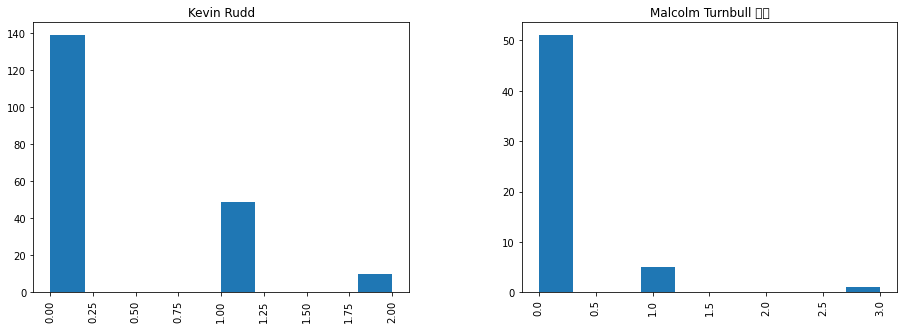

In [163]:
# Pandas histogram by group:
df.hist(by='user_id',
       column='hashtags_used', figsize=[15, 5])

In [165]:
#combining the above 2 table Hastag count for kevin and Rudd
total = pd.merge(Malcolm_hashtags, Rudd_hashtags, on = ['hashtags_used'], how = 'outer')
total.fillna(0, inplace=True)
total['Malcolm Turnbull 💉💉'] = total['Malcolm Turnbull 💉💉']. astype(int)
total['Kevin Rudd'] = total['Kevin Rudd']. astype(int)
total.set_index('hashtags_used', inplace=True)
total = total.sort_index()
total

,Malcolm Turnbull 💉💉,Kevin Rudd
hashtags_used,,
0,51,139
1,5,49
2,0,10
3,1,0


Text(0, 0.5, 'Hashtag count per tweet')

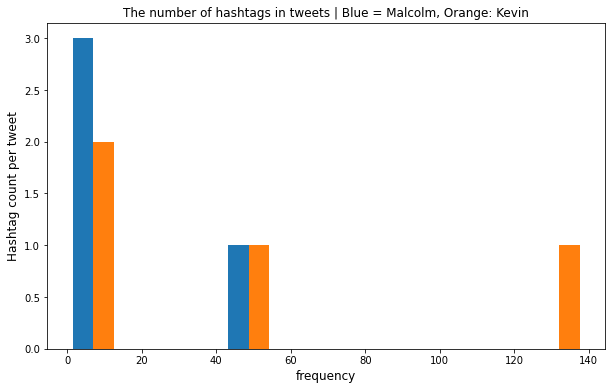

In [193]:
plt.figure(figsize=(10,6))
plt.hist(total, label=['Malcolm Turnbull 💉💉', 'Kevin Rudd'])
plt.title('The number of hashtags in tweets | Blue = Malcolm, Orange: Kevin', fontsize = 12)
plt.xlabel('frequency', fontsize = 12)
plt.ylabel('Hashtag count per tweet', fontsize = 12)

# Task 5
Calculate the log odds ratio for each word used in the set of tweets, and list the 20 words most strongly associated with each of the two users.
- listing 20 words with association.
- indicate the relationship between two things
- Fisher's Exact Test, The Wald Test, Chi-Square Test

-ref: https://www.youtube.com/watch?v=8nm0G-1uJzA&ab_channel=StatQuestwithJoshStarmer

## Task 6
Use the vaderSentiment module to calculate the sentiment of each tweet, and then for each of the two users, calculate the average 'compound' sentiment for all their tweets.

The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

 

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values used most of the time are: 

1. positive sentiment: compound score >= 0.05 

2. neutral sentiment: (compound score > -0.05) and (compound score < 0.05) 

3. negative sentiment: compound score <= -0.05